# The Perceptron

In [67]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [68]:
y_pred

array([ True, False])

# Regression MLPs

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

/home/juliovr/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:787: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.5205685772887542

# Classification MLPs

In [70]:
from sklearn.neural_network import MLPClassifier

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[10], max_iter=10_000, random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_clf
)

pipeline.fit(X_train, y_train)

score = pipeline.score(X_valid, y_valid)
score

1.0

# Implementing MLPs with Keras

## Image classifier with Sequential API

In [71]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [72]:
X_train.shape

(55000, 28, 28)

In [73]:
X_train.dtype

dtype('uint8')

In [74]:
# Scale the pixel intensities to 0-1 range
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [75]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [76]:
1 - X_train[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [77]:
y_train[0]

9

In [78]:
class_names[y_train[0]]

'Ankle boot'

In [79]:
import matplotlib.pyplot as plt

def plot_fashion(data, labels):
    nrows = 4
    ncols = 10
    plt.figure(figsize=(ncols * 1.2, nrows * 1.2))

    data = data.reshape(-1, 28, 28)
    for index, (image, label_index) in enumerate(zip(data, labels)):
        label = class_names[label_index]
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

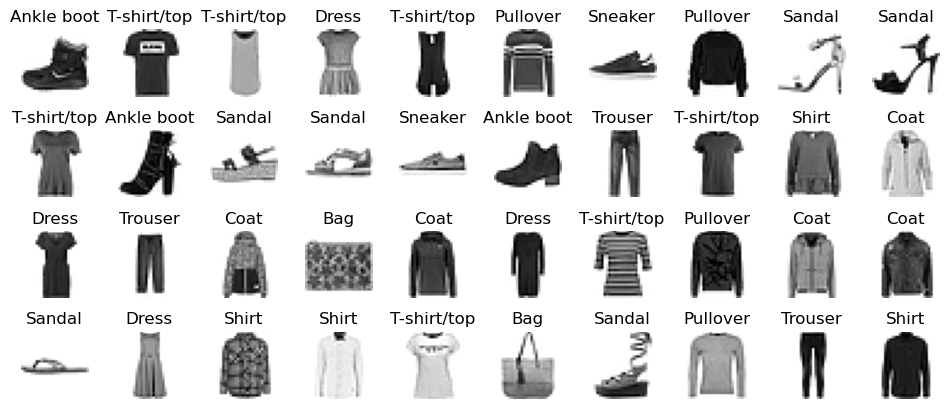

In [80]:
plot_fashion(X_train[:40], y_train[:40])

## Creating the model using the sequential API

In [81]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # Exclusion classes (1 neuron per unique class)

In [82]:
# Compact version of the previous code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

/home/juliovr/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_23, built=True>,
 <Dense name=dense_24, built=True>,
 <Dense name=dense_25, built=True>]

In [85]:
weights, biases = model.get_layer("dense_3").get_weights()

ValueError: No such layer: dense_3. Existing layers are: ['flatten_3', 'dense_23', 'dense_24', 'dense_25'].

In [ ]:
weights

In [ ]:
weights.shape

In [ ]:
biases

In [ ]:
biases.shape

## Compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

## Using the model to make predictions

In [ ]:
X_new = X_test[:3] # Use the first three instances as if they were unknown
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_test[:3] # The actual three instances
# They have the same values, so the predictions are correct

In [ ]:
plot_fashion(X_new, y_pred)

# Building a Regression MLP using the sequential API

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

In [ ]:
y_test[:3]

In [ ]:
model.summary()

# Building complex models using the functional API

## 2 different paths that converge at the end

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="mse", metrics=["RootMeanSquaredError"])

In [ ]:
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

## 2 different paths from 2 different inputs

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

# Simulate new data to check agains predictions
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

In [ ]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

In [ ]:
y_test[:3]

## 2 inputs and 2 outputs

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [ ]:
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

# Simulate new data to check agains predictions
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

In [ ]:
y_pred_main

In [ ]:
y_pred_aux

# Using the subclassing API to build dynamic models

In [ ]:
# class WideAndDeepModel(tf.keras.Model):
#     def __init__(self, units=30, activation="relu", **kwargs):
#         super().__init__(**kwargs) # needed to support naming the model
#         self.norm_layer_wide = tf.keras.layers.Normalization()
#         self.norm_layer_deep = tf.keras.layers.Normalization()
#         self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
#         self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
#         self.main_output = tf.keras.layers.Dense(1)
#         self.aux_output = tf.keras.layers.Dense(1)

#     def call(self, inputs):
#         input_wide, input_deep = inputs
#         norm_wide = self.norm_layer_wide(input_wide)
#         norm_deep = self.norm_layer_deep(input_deep)
#         hidden1 = self.hidden1(norm_deep)
#         hidden2 = self.hidden2(hidden1)
#         concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#         output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
        
#         return output, aux_output    

In [ ]:
# model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [ ]:
# model.summary()

# Saving and Restoring a model

In [ ]:
from pathlib import Path

Path("keras_models").mkdir(parents=True, exist_ok=True)

model.save("keras_models/my_keras_model.keras")

In [ ]:
model = tf.keras.models.load_model("keras_models/my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

# Using callbacks to save checkpoints during fit()

In [ ]:
# Use callback to save the model at the end of each epoch
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/my_checkpoints.weights.h5", save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

In [ ]:
# Set early stopping after a number of epochs with no progress
n_epochs = 10
rollback_to_best_model = True
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=rollback_to_best_model)
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Using TensorBoard for visualization

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y%m%d_%H%M%S")

In [ ]:
run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train), 
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100 # Gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000 # Gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network hyperparameters

In [86]:
import keras_tuner as kt

# Compiles an MLP to classify fashion MNIST images, and tune the number of hidden layers (n_hidden), 
# the number of neurons per layer (n_neurons), the learning rate (learning_rate) and the type of optimizer (optimizer).

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [87]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 45s]
val_accuracy: 0.7630000114440918

Best val_accuracy So Far: 0.8525999784469604
Total elapsed time: 00h 03m 37s


In [88]:
top3_models = random_search_tuner.get_best_models(num_models=3)
top3_models

/home/juliovr/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [89]:
best_model = top3_models[0]
best_model

<Sequential name=sequential, built=True>

In [90]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [91]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8525999784469604


In [92]:
best_trial.metrics.get_last_value("val_accuracy")

0.8525999784469604

In [93]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4404 - loss: 3.1326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1843 - loss: 2.2158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1997 - loss: 1.9071
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1996 - loss: 1.7653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1980 - loss: 1.7732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1939 - loss: 1.8838
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1978 - loss: 1.8196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1981 - loss: 1.8191
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1975 - loss: 1.8188
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1980 - loss: 1.8185
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1931 - loss: 1.8065


In [94]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)

        return model.fit(X, y, **kwargs)

In [95]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2, overwrite=True,
    directory="my_fashion_mnist", project_name="hyperband"
)

In [96]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb])

Trial 19 Complete [00h 00m 28s]
val_accuracy: 0.8321999907493591

Best val_accuracy So Far: 0.8787999749183655
Total elapsed time: 00h 05m 08s

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
6                 |4                 |n_hidden
75                |50                |n_neurons
0.00018241        |0.00098245        |learning_rate
sgd               |adam              |optimizer
True              |False             |normalize
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1267 - loss: 2.3023 - val_accuracy: 0.1548 - val_loss: 2.2869
Epoch 2/4
1439/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1791 - loss: 2.2793

KeyboardInterrupt: 

# Exercises

4. Why was the sigmoid activation function a key ingredient in training the first MLPs?<br>
R. The result of the step function of the neuron is linear, so applying a gradient descent would not work. The logistic function (sigmoid) has a well-defined non-zero derivative everywhere, so it make some progress at each step.
5. Name three popular activation functions. Can you draw them?<br>
R. Heaviside, ReLU and sigmoid
8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff<br>
R. Reverse-mode automatic differentiation is the process of finding how to tweak each weight connection and bias for each neuron to reduce the neural net error in just 2 passes (one forward and one backward). Combining the reverse mode autodiff and the use of these values to perform gradient descent steps is called backpropagation.
9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?<br>
R. The hyperparameters could be: the number of hidden layers, the number of neurons per hidden layers, the activation function used in the hidden layers and in the output layer. In the output layer, the usual activation functions would be: for binary classification, sigmoid; for multiclass classification, softmax; for regression no activation function. If MLP overfits the training data, reducing the number of hidden layers or the number of neurons in the hidden layers should reduce the overfitting.

## Heaviside activation function

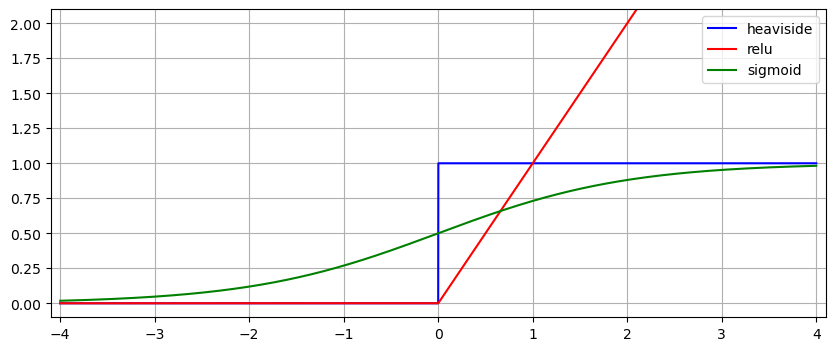

In [97]:
import matplotlib.pyplot as plt
import math

def heaviside(x):
    return 0.0 if x < 0.0 else 1.0

def relu(x):
    return 0.0 if x < 0.0 else x

def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

X = np.linspace(-4.0, 4.0, 10000)
heaviside_y = np.vectorize(heaviside)(X)
relu_y = np.vectorize(relu)(X)
sigmoid_y = np.vectorize(sigmoid)(X)

plt.figure(figsize=(10, 4))

plt.plot(X, heaviside_y, "b-", label="heaviside")
plt.plot(X, relu_y, "r-", label="relu")
plt.plot(X, sigmoid_y, "g-", label="sigmoid")

plt.legend()
plt.axis([-4.1, 4.1, -0.1, 2.1])
plt.grid()
plt.show()

## 10

In [98]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [99]:
import matplotlib.pyplot as plt

def plot_digit(data):
    data = data.reshape(28, 28)
    plt.imshow(data, cmap="binary")
    plt.axis("off")
    plt.show()

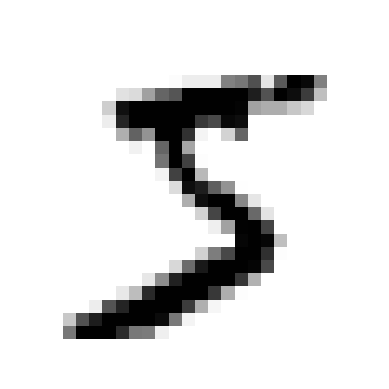

In [100]:
plot_digit(X_train[0])

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [103]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8394 - loss: 0.6169 - val_accuracy: 0.9334 - val_loss: 0.2538
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9190 - loss: 0.2849 - val_accuracy: 0.9480 - val_loss: 0.1961
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9341 - loss: 0.2321 - val_accuracy: 0.9548 - val_loss: 0.1669
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9433 - loss: 0.1987 - val_accuracy: 0.9612 - val_loss: 0.1467
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9502 - loss: 0.1739 - val_accuracy: 0.9644 - val_loss: 0.1316
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9559 - loss: 0.1541 - val_accuracy: 0.9662 - val_loss: 0.1200
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9608 - loss: 0.1381 - val_accuracy: 0.9698 - val_loss: 0.1110
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1247 - 

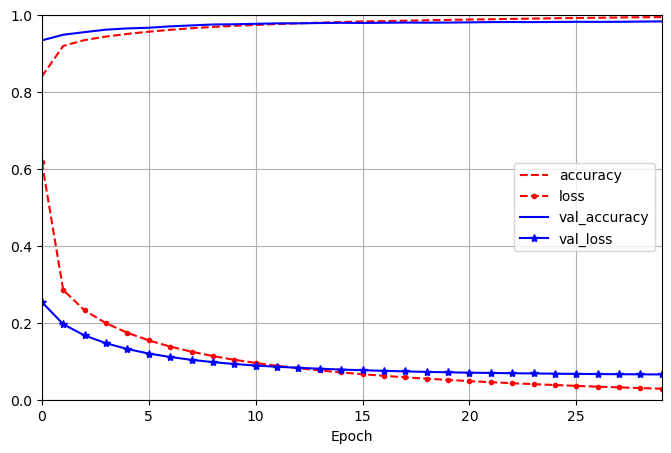

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [105]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0714


[0.07139980792999268, 0.9778000116348267]

### Trying to improve the model

In [123]:
import keras_tuner as kt

# def build_model(hp):
#     n_hidden = hp.Int("n_hidden", min_value=0, max_value=8)
#     n_neurons = hp.Int("n_neurons", min_value=16, max_value=512)
#     learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
#     optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
#     if optimizer == "sgd":
#         optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
#     else:
#         optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#     for _ in range(n_hidden):
#         model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
#     model.add(tf.keras.layers.Dense(10, activation="softmax"))

#     model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#     return model
def build_model(hp):
    learning_rate = hp.Float("learning_rate", min_value=1e-6, max_value=1e-2)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model

In [124]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=6, overwrite=True,
                                     directory="mnist", project_name="rnd_search_minst", seed=42)

root_logdir = Path(random_search_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("keras_models/mnist_checkpoint.weights.h5", save_weights_only=True)


random_search_tuner.search(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb, checkpoint_cb])

Trial 6 Complete [00h 01m 47s]
val_accuracy: 0.97079998254776

Best val_accuracy So Far: 0.9779999852180481
Total elapsed time: 00h 10m 48s


In [125]:
best_model = random_search_tuner.get_best_models(num_models=1)[0]

In [126]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=1)[0]
top_params.values

{'learning_rate': 0.008882792496448428}

In [128]:
history = best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0526
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0495
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0466
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9888 - loss: 0.0440
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0416
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0394
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0373
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0353
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0335


In [129]:
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0701


[0.070120669901371, 0.9771999716758728]

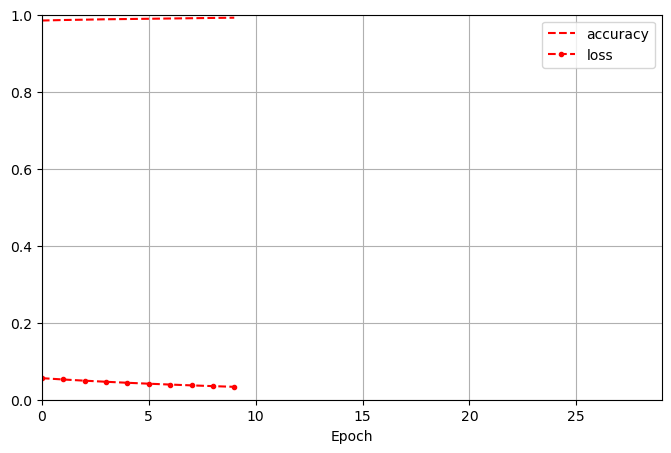

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# xlim: 0-29 -> there are 30 epochs
# ylim: 0-1 -> just because the values ranges from 0 to 1
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"]
)
plt.show()